Занятие 5. Проверка статистических гипотез.
====================

* Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>
Критерий Шапиро-Уилка [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.shapiro.html).<br>


* Критерий согласия Стьюдента.<br>
H0: $\mu = M$<br>
H1: $\mu \ne M$<br>
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).<br>


* Проверка гипотезы о равенстве средних значений.<br>
H0: $\mu_1 = \mu_2$<br>
H1: $\mu_1 \ne \mu_2$<br>
Распределение выборок должно быть близко к нормальному.<br>
  * Для несвязных выборок: [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html).<br>
  * Для связных выборок: [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).<br>
  

* Проверка гипотезы о равенстве медиан.<br>
  * Для несвязных выборок: критерий Манна-Уитни [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).<br>
  * Для связных выборок: критерий Уилкоксона [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html).<br>
  * Критерий Муда [scipy.stats.median_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html).<br>


* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>


* Проверка гипотезы о равенстве долей категориального признака.<br>
H0: $p_1 = p_2$<br>
H1: $p_1 \ne p_2$<br>
Критерий хи-квадрат [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.chi2_contingency.html).<br>


* Проверка гипотезы о независимости (корреляция).<br>
H0: X и Y независимы<br>
H1: X и Y зависимы<br>
  * Для непрерыных величин: корреляция Пирсона [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html),<br>
  * Для дискретных величин: корреляция Спирмэна [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kendalltau.html).<br>


Большинство из этих функций вовзращает два значения (бывает и больше). Но всегда первое из них -- значение статистики критерия, второе -- p-value. Нам будет интересно именно p-value.

Замечание. В реализациях критериев Стьюдента и Манна-Уитни-Уилкоксона нет возможности задать одностороннюю альтернативную гипотезу. В этих случаях нулевую гипотезу нужно отвергать, если $\frac{\text{p-value}}{2} < \alpha$.

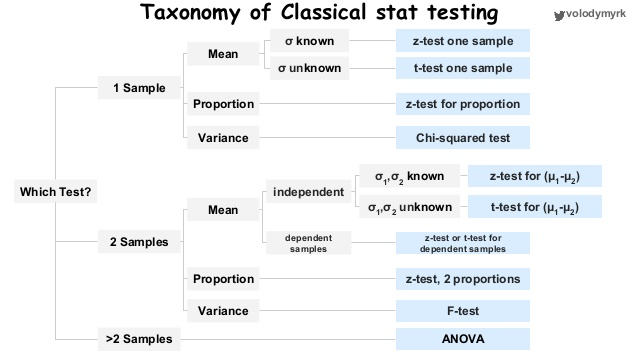

In [ ]:
from IPython.display import Image
# https://www.slideshare.net/vladimirkazantsev/how-to-concludeonlineexperimentsinpython
Image("stat_tests.jpg")

# Пример 1. Проверка нормальности распределения


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
# https://drive.google.com/file/d/18O01bJWp2lueaEXcPgLUQYnc1YhD4v7N/view?usp=sharing
! gdown 18O01bJWp2lueaEXcPgLUQYnc1YhD4v7N

Downloading...
From: https://drive.google.com/uc?id=18O01bJWp2lueaEXcPgLUQYnc1YhD4v7N
To: /content/town_1959_2.csv
100% 19.1k/19.1k [00:00<00:00, 21.7MB/s]


In [3]:
df = pd.read_csv('town_1959_2.csv', encoding='cp1251')
df = df.set_index(u'номер')

In [4]:
df.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


(array([990.,  12.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([1.00000e-01, 5.04690e+02, 1.00928e+03, 1.51387e+03, 2.01846e+03,
        2.52305e+03, 3.02764e+03, 3.53223e+03, 4.03682e+03, 4.54141e+03,
        5.04600e+03]),
 <BarContainer object of 10 artists>)

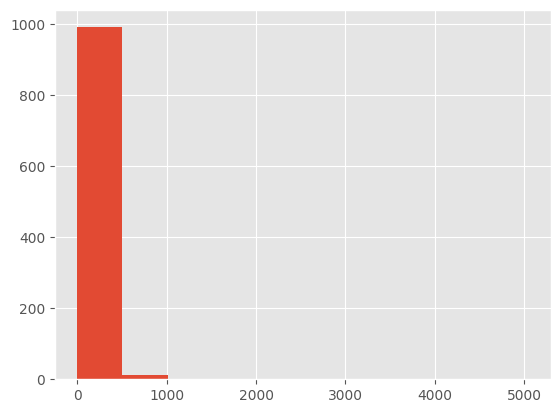

In [6]:
plt.hist(df['население'])

(array([  1.,   8.,  24., 127., 408., 302.,  88.,  33.,  11.,   2.]),
 array([-1.        , -0.52970528, -0.05941055,  0.41088417,  0.8811789 ,
         1.35147362,  1.82176835,  2.29206307,  2.7623578 ,  3.23265252,
         3.70294725]),
 <BarContainer object of 10 artists>)

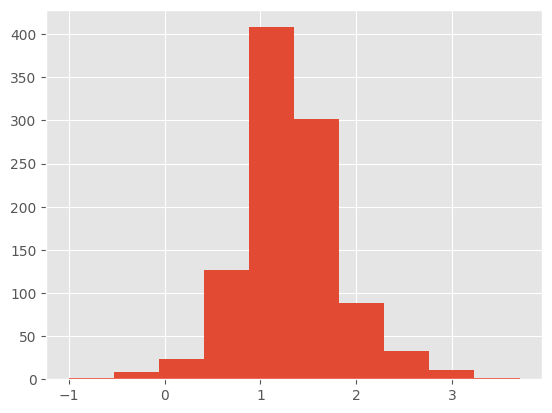

In [5]:
# рассмотри данные после логарифмирования )
plt.hist(np.log10(df['население']))

In [7]:
res = stats.shapiro(np.log10(df[u'население']))
print('p-value: ', res[1])

p-value:  3.1486824866172602e-12


p-value получился маленьким (меньше $\alpha = 0.01, 0.05$). А почему получилось не нормальное распределение? Гистограмма же была колоколообразной. Станет понятнее, если увеличить число столбцов.

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  2.,  1.,  1.,  2.,  4.,
         7., 10.,  7., 19., 21., 32., 48., 49., 91., 86., 89., 93., 78.,
        78., 63., 42., 41., 21., 23., 16., 16., 12.,  8., 12.,  8.,  4.,
         1.,  7.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([-1.        , -0.90594106, -0.81188211, -0.71782317, -0.62376422,
        -0.52970528, -0.43564633, -0.34158739, -0.24752844, -0.1534695 ,
        -0.05941055,  0.03464839,  0.12870734,  0.22276628,  0.31682523,
         0.41088417,  0.50494312,  0.59900206,  0.69306101,  0.78711995,
         0.8811789 ,  0.97523784,  1.06929679,  1.16335573,  1.25741468,
         1.35147362,  1.44553257,  1.53959151,  1.63365046,  1.7277094 ,
         1.82176835,  1.91582729,  2.00988624,  2.10394518,  2.19800413,
         2.29206307,  2.38612202,  2.48018096,  2.57423991,  2.66829885,
         2.7623578 ,  2.85641674,  2.95047569,  3.04453463,  3.13859358,
         3.23265252,  3.32671147,  3.42077041,  3.51482936,

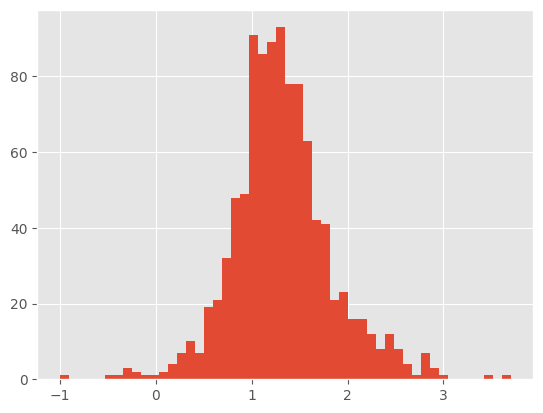

In [8]:
plt.hist(np.log10(df[u'население']), bins=50)

Первая причина в том, что есть 3 выброса - 1 слева и 2 справа

Вторая причина - столбцы слишком высокие

Если убрать выбросы, то t-критерий можно применить - отклонения от нормальности несущественны

# Пример 2. Критерий Манна-Уитни. Дома в Альбукерке (на углу VS не на углу)

Описание данных:
- price - цена
- sqft - площадь в футах 2
- age - возраст дома
- feast - кол-во удобств
- ne - расположен ли дом в престижном северо-восточном районе
- cust - был ли дом спец постройкой
- cor - расположен ли дом на углу
- tax - налоги


In [9]:
# https://drive.google.com/file/d/1g4oCaCZO7789bA89eNqBnPXMubvdsO1_/view?usp=sharing
! gdown 1g4oCaCZO7789bA89eNqBnPXMubvdsO1_

Downloading...
From: https://drive.google.com/uc?id=1g4oCaCZO7789bA89eNqBnPXMubvdsO1_
To: /content/Albuquerque Home Prices_data.txt
100% 3.17k/3.17k [00:00<00:00, 5.32MB/s]


In [10]:
df = pd.read_csv('/content/Albuquerque Home Prices_data.txt', sep='\t')

In [11]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


Хотим проверить, что цены домов на углу (```COR = 1```) отличаются от цен домов не на углу (```COR = 0```). Хотим попробовать применить критерий Стьюдента, но предварительно нужно:
1. Проверить на относительную нормальность данных, без выбросов
2. Проверить равенство дисперсий.

Очевидно, что значение -9999 здесь употребляется в качестве пустого значения (так пустое значение обозначалось в пакете статистика). Нужно заменить его на корректное пустое значение.

In [12]:
# заменяем на non available number
df = df.replace(-9999, np.nan)

In [13]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Сохраним в отдельные переменные выборки, которые собираемся сравнивать. Часто такие переменные называют группирующими, потому что по ним легко группировать

In [14]:
x = df[df['COR'] == 1]['PRICE']
y = df[df['COR'] == 0]['PRICE']
x.name, y.name = 'corner', 'not corner'

Проверяем нормальность распределений. Построим 2 распределения, критерием пользоваться не будем

In [23]:
# Функции определяются так. 
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.

    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

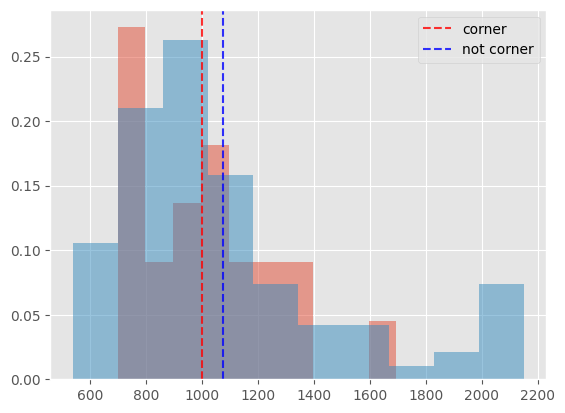

In [24]:
# вызываем функцию для определённых выше векторов x, y.
two_histograms(x, y)

В распределении есть очевидные выбросы, которые не дают применить критерий Стюдента. Можно было бы попробовать избавиться от них, но первой (красной) гистограмме это не поможет (левый слишком большой). 

Тогда можно поробовать применить непараметрические критерии. **Критерий Уилкоксона применим только для парных выборок.** У нас же в разных выборках находятся разные объекты (дома). Поэтому нам остаётся критерий Манна-Уитни.

In [25]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.8044081572425339


p-value получилось достаточно большим, поэтому у нас нет оснований отвергнуть гипотезу. 

Вывод: цены домов различаются статистически незначимо, разница медиан в выборках случайна.

Пример 3. Дома в Альбукерке (северо-восток VS остальные)
=========================

In [26]:
# df загружен в предыдущем примере
x = df[df['NE'] == 1]['PRICE']
y = df[df['NE'] == 0]['PRICE']
x.name, y.name = 'NE', 'not NE'

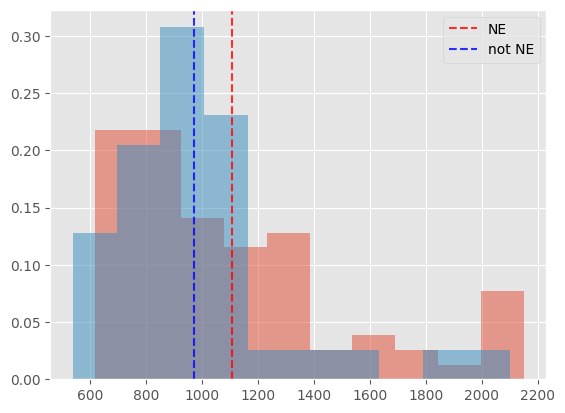

In [27]:
two_histograms(x, y)

Снова видим выбросы в данных, критерий Стьюдента здесь лучше не применять

In [28]:
stats.median_test(x, y)

MedianTestResult(statistic=0.5171317942723553, pvalue=0.4720677479376454, median=960.0, table=array([[41, 17],
       [37, 22]]))

Снова делаем вывод о том, что распределения цен на дома в разных районах статистически не отличаются

# Пример 4. Критерий Стьюдента для независимых выборок. 
Возраст, в котором умирают европейские аристократы.


Данные о возрасте, в котором умирали европейцы в середине 19 века, в зависимости от их класса (sovereignty, aristocracy, and gentry).

In [29]:
# https://drive.google.com/file/d/1wslt8K8bAgQUphFUBlPy19F023GswkqY/view?usp=sharing
! gdown 1wslt8K8bAgQUphFUBlPy19F023GswkqY

Downloading...
From: https://drive.google.com/uc?id=1wslt8K8bAgQUphFUBlPy19F023GswkqY
To: /content/agedeath.dat.txt
100% 111k/111k [00:00<00:00, 72.4MB/s]


In [30]:
df = pd.read_csv('agedeath.dat.txt', sep='\s+', header=None, names=['group', 'age', 'index'])

In [32]:
# 3 группы - аристократы, обычные люди и короли
df.group.unique()

array(['aris', 'gent', 'sovr'], dtype=object)

In [31]:
df.head()

,group,age,index
0,aris,21,1
1,aris,21,2
2,aris,21,3
3,aris,21,4
4,aris,21,5


In [33]:
x = df[df['group'] == 'sovr']['age']
y = df[df['group'] == 'aris']['age']
x.name, y.name = 'sovr', 'aris'

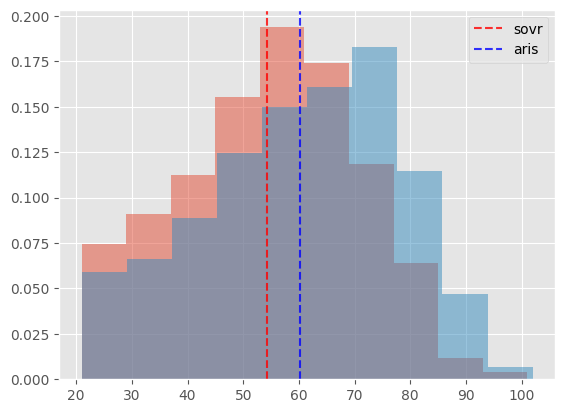

In [34]:
two_histograms(x, y)

Данные условно нормальны. Проверим c помощью критерия Флигнера-Килина, равны ли дисперсии.

In [35]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.00010116077103844913


Значение p-value низкое, поэтому гипотезу о равенстве дисперсий отвергаем. 
Видим, что оаспределения условно нормальные - выбросов нет, условно симметричны, колоколообразны - применим t-test.


В двух выборках находятся разные наблюдаемые объекты, то есть выборки несвязные. Итого, гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=False```.

In [36]:
res = stats.ttest_ind(x, y, equal_var=False)
print('p-value: ', res[1])

p-value:  1.5181184197728794e-26


Гипотеза о равенстве возрастов отвергается.

# Пример 5. Критерий Стьюдента для парных выборок. 
Чтение названий цветов

Исследование 1935 года, в котором изучалась скорость чтения названий цветов в зависимости от того, шрифт какого цвета использовался.

In [37]:
# https://drive.google.com/file/d/1w7CY7tuQ_zMGtf8nweIVZAsV16ctPcNx/view?usp=sharing
! gdown 1w7CY7tuQ_zMGtf8nweIVZAsV16ctPcNx

Downloading...
From: https://drive.google.com/uc?id=1w7CY7tuQ_zMGtf8nweIVZAsV16ctPcNx
To: /content/interference.csv
100% 1.13k/1.13k [00:00<00:00, 1.67MB/s]


In [38]:
df = pd.read_csv('interference.csv')

In [39]:
df.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


In [40]:
x = df['DiffCol']
y = df['Black']
x.name, y.name = 'DiffCol', 'Black'

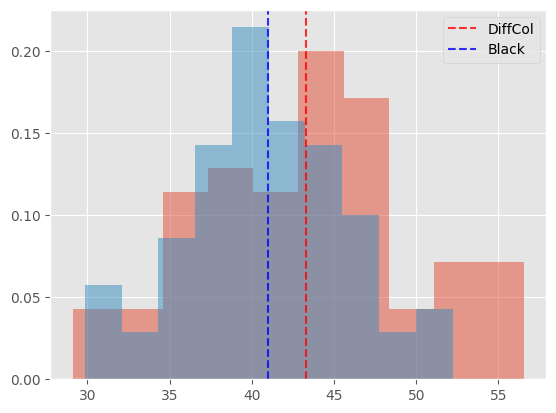

In [41]:
two_histograms(x, y)

Распределения условно нормальны.  **Поскольку в наблюдениях содержатся одни и те же люди, которых просили прочитать различные шрифты, поэтому выборки у нас связные**, а значит используем ```ttest_rel```.

In [42]:
res = stats.ttest_rel(x, y)
print('p-value: ', res[1])

p-value:  0.0162416779538072


p-value получился довольно низким, но возможно не таким низким, как хотелось бы. На уровне значимости 0.05 гипотеза будет отвергнута, но на уровне 0.01 уже нет. Решение за исследователем. Всё зависит от того, насколько сильно мы боимся ошибки первого рода, насколько сильно мы должны ручаться за выводы.

Пример 6. Популярность кандидата.
=================
В регионе ожидаются выборы. Команда кандидата проводит опрос, в результате которого в поддержку кандидата выказалось 28% из 100 опрошенных в городе и 20% из 100 опрошенных на селе. Нужно выяснить, является ли эта разница статистически значимой, и нужно ли разворачивать дополнительную рекламную кампанию на селе.

Проверять будем критерием хи-квадрат т.н. гипотезу однородности. Сначала построим таблицу сопряжённости.

In [46]:
contingency_table = pd.DataFrame([[28, 72], [20, 80]],
                                 index=['city', 'country'],
                                 columns=['for', 'against'])
contingency_table

,for,against
city,28,72
country,20,80


In [47]:
res = stats.chi2_contingency(contingency_table)
print ('p-value: {0}'.format(res[1]))

p-value: 0.2464701206916715


p-value получился достаточно большим, поэтому оснований отвергнуть гипотезу о равенстве долей нет.

Критерий хи-квадрат часто используется при А/Б тестах, например проверка конверсии при замене лендинга сайта.

Пример 7. Корреляция цены и площади домов в Альбукерке.
--------------------

In [49]:
df = pd.read_csv('/content/Albuquerque Home Prices_data.txt', sep='\t')
df = df.replace(-9999, np.nan)

In [50]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Проверим очевидный факт, что площадь дома коррелирует с его ценой.

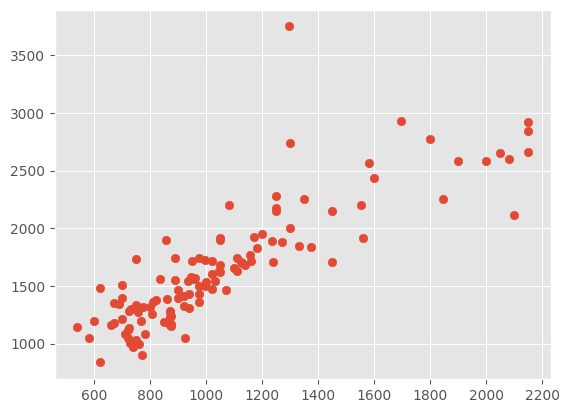

In [51]:
plt.scatter(df['PRICE'], df['SQFT'])

In [52]:
res = stats.pearsonr(df['PRICE'], df['SQFT'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.8447950985552124
p-value:  5.146345707628998e-33


Коэффициент корреляции 0 не равен, зависимость достаточно большая.

## NB 
Если есть пропуски в данных, то p-value выдаст 1, а коэффициент корреляции будет не определен. Достаточно неприятный момент, который важно контролировать.